In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_path = "/Library/Fonts/Arial Unicode.ttf"
fontprop = fm.FontProperties(fname=font_path, size=18)

## 데이터 불러오기

In [10]:
"""
for i in range(14):
    with open("/Users/heogeonhyeock/Desktop/인빅_프로젝트/택배배송/Delivery{}.pickle".format(i+1),"rb") as fr:
        globals()["Delivery{}".format(i+1)] = pickle.load(fr)
"""

with open("/Users/heogeonhyeock/Desktop/인빅_프로젝트/택배배송/Delivery.pickle","rb") as fr:
    Delivery = pickle.load(fr)

## 데이터 전처리

In [14]:
Delivery[Delivery["집배시간"] >= 220000]

,구분명,집화일자,집배일자,운임명,수량(BOX),운임,집화여부,집배시간,배달일자,장비구분,품목,SM명,받는분주소
8684,배달,2021-04-25,2021-04-27,신용,1,2500,Y,220913,2021-04-27,스마트폰,패션 의류,216,경기도 화성시 서신면 재안골길 67
21422,배달,2021-04-19,2021-04-20,신용,1,5000,Y,220039,2021-04-20,스마트폰,패션 의류,259,경기도 화성시 마도면 금당리
21450,배달,2021-04-19,2021-04-20,선불,1,2500,Y,220043,2021-04-20,스마트폰,패션 의류,259,경기도 화성시 마도면 두곡서길26번길 2-18
21721,배달,2021-04-19,2021-04-20,선불,1,3500,Y,220052,2021-04-20,스마트폰,패션 의류,259,"경기 화성시 마도면 두곡서길26번길 5,"
21729,배달,2021-04-19,2021-04-20,신용,1,3500,Y,220048,2021-04-20,스마트폰,패션 의류,259,경기도 화성시 마도면 두곡리 359-1 진경빌라
...,...,...,...,...,...,...,...,...,...,...,...,...,...
191998,배달,2021-04-07,2021-04-08,신용,1,2500,Y,224604,2021-04-08,스마트폰,생활/건강,275,[185-46] 경기도 화성시 송산면 문지안길21번길
192003,배달,2021-04-06,2021-04-07,신용,1,2500,Y,230555,2021-04-07,스마트폰,생활/건강,275,경기도 화성시 송산면 송산포도로 102-18
192004,배달,2021-04-06,2021-04-07,신용,1,2500,Y,222806,2021-04-07,스마트폰,생활/건강,275,"경기 화성시 송산면 송산포도로 102-27 (사강리, 사강아파트)"
192010,배달,2021-04-07,2021-04-08,신용,1,5000,Y,223817,2021-04-08,스마트폰,생활/건강,275,(18550) 경기도 화성시 송산면 사강로


In [3]:
"""
구분명 장비구분 sm명 집배시간 : 삭제
수량box : 99.9% 이상이 1의 값
집화여부가 Y인 경우만 고려
datediff = 집배일자와 집화일자의 차이, 즉 배송걸린 날짜
"""

from datetime import datetime
Delivery = Delivery.drop(["구분명","장비구분", "SM명","수량(BOX)", "집배시간","받는분주소","배달일자","운임","운임명"], axis = 1)[Delivery["집화여부"] == "Y"]
Delivery["Date_diff"] = Delivery["집배일자"] - Delivery["집화일자"]
Delivery = Delivery.drop(["집화일자", "집배일자", "집화여부"], axis = 1)
Delivery = Delivery[Delivery["Date_diff"] >= "0 days"]
Delivery["count"] = 1
Delivery

,품목,Date_diff,count
0,패션 의류,1 days,1
1,패션 의류,1 days,1
2,패션 의류,1 days,1
3,패션 의류,1 days,1
4,패션 의류,1 days,1
...,...,...,...
371974,생활/건강,2 days,1
371975,생활/건강,1 days,1
371976,생활/건강,1 days,1
371977,생활/건강,1 days,1


<ipython-input-9-296bf0e57012>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  A["Date_diff"][i] = int(A["Date_diff"][i].split()[0])
<ipython-input-9-296bf0e57012>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  B["count"] = np.round(B["count"]/B["count"].sum(),5)
<ipython-input-9-296bf0e57012>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavi

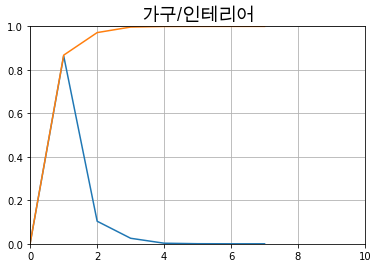

<ipython-input-9-296bf0e57012>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  B["count"] = np.round(B["count"]/B["count"].sum(),5)
<ipython-input-9-296bf0e57012>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


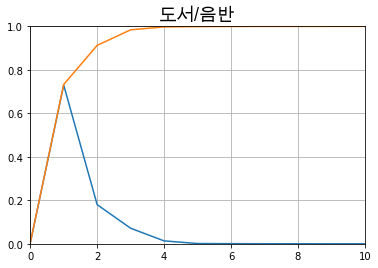

<ipython-input-9-296bf0e57012>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  B["count"] = np.round(B["count"]/B["count"].sum(),5)
<ipython-input-9-296bf0e57012>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


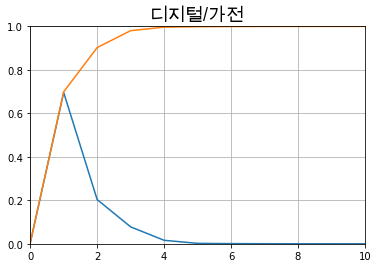

<ipython-input-9-296bf0e57012>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  B["count"] = np.round(B["count"]/B["count"].sum(),5)
<ipython-input-9-296bf0e57012>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


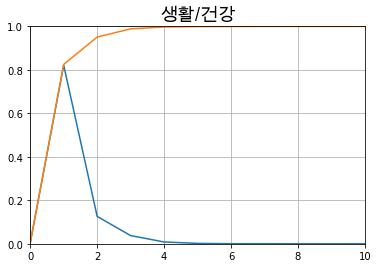

<ipython-input-9-296bf0e57012>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  B["count"] = np.round(B["count"]/B["count"].sum(),5)
<ipython-input-9-296bf0e57012>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


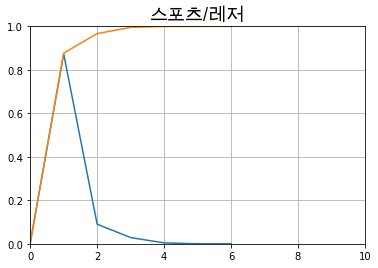

<ipython-input-9-296bf0e57012>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  B["count"] = np.round(B["count"]/B["count"].sum(),5)
<ipython-input-9-296bf0e57012>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


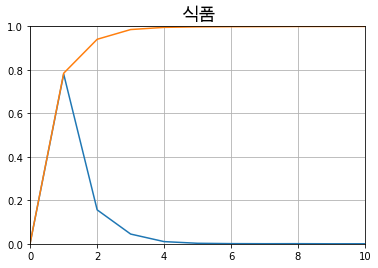

<ipython-input-9-296bf0e57012>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  B["count"] = np.round(B["count"]/B["count"].sum(),5)
<ipython-input-9-296bf0e57012>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


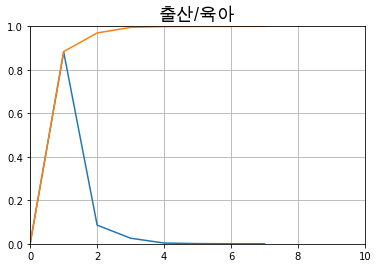

<ipython-input-9-296bf0e57012>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  B["count"] = np.round(B["count"]/B["count"].sum(),5)
<ipython-input-9-296bf0e57012>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


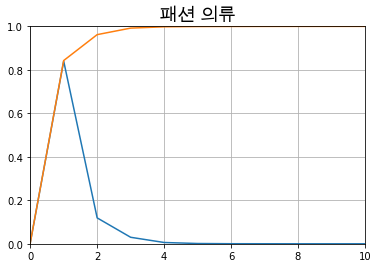

<ipython-input-9-296bf0e57012>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  B["count"] = np.round(B["count"]/B["count"].sum(),5)
<ipython-input-9-296bf0e57012>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


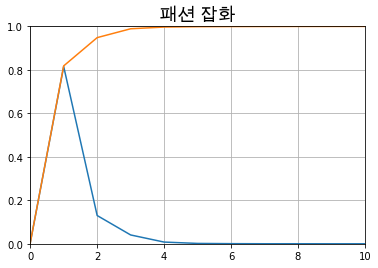

<ipython-input-9-296bf0e57012>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  B["count"] = np.round(B["count"]/B["count"].sum(),5)
<ipython-input-9-296bf0e57012>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


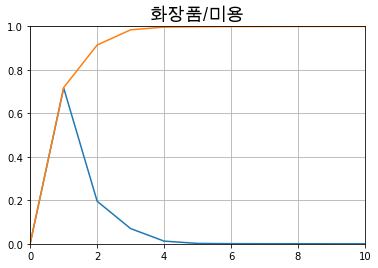

In [9]:
A = Delivery.groupby(["품목","Date_diff"]).sum()["count"]
A = pd.DataFrame(A).reset_index().astype({"Date_diff":"str"})

for i in range(len(A)):
    A["Date_diff"][i] = int(A["Date_diff"][i].split()[0])

for i in A["품목"].unique():
    B = A[A["품목"] == i]
    B["count"] = np.round(B["count"]/B["count"].sum(),5)
    
    ratio = []
    for j in range(1,len(B)+1):
        ratio.append(B["count"][:j].sum())
    
    plt.plot(B["Date_diff"],B["count"])
    plt.plot(B["Date_diff"],ratio)
    plt.xlim([0 , 10])      
    plt.ylim([0, 1])
    ax = plt.axes()   
    ax.yaxis.grid()
    ax.xaxis.grid()
    plt.title(i,fontproperties=fontprop)
    plt.show()
    

'가구/인테리어'